<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Extra_Class_Homework_Muhammad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/diamonds.csv")

## Metadata

Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Periksalah apakah setiap kolom sudah memiliki tipe data yang benar? Jika ada yang belum benar, mohon diperbaiki.
2. Periksalah apakah terdapat missing values? Jika ya, berapa baris yang memiliki missing values? 
3. Buatlah visualisasi untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada hal yang janggal? Jika ya, apa saja kejanggalan yang dimaksud? Berapa banyak kejanggalan yang terjadi?
4. Seorang calon pembeli berlian bertanya kepada kalian, "Konon katanya semakin tinggi kualitas `clarity` dari sebuah berlian, maka harganya pun akan semakin mahal. Tapi mengapa rata-rata harga berlian dengan clarity `SI2` lebih tinggi dari rata-rata harga berlain dengan clarity `IF`?" Coba berikan penjelasan (dan mungkin visualisasi) yang dapat membantu kalian menjawab kebingungan calon pembeli tersebut!

In [ ]:
# Check first 5 rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


###No. 1

---



In [ ]:
# Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Check unique value
for x in df.columns:
  print(f"unique of {x} ")
  print(f"{df[x].unique()}")
  print()

unique of Unnamed: 0 
[    1     2     3 ... 53938 53939 53940]

unique of carat 
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.1

In [ ]:
# Check duplicate
df.duplicated().sum()

0

Melihat dari info dan unique value, sepertinya semua tipe data sudah benar. Hanya saja ada unnamed column yang sepertinya itu adalah index dari dataframe tersebut, karena nilainya berurutan dari 1 sampai 53940. Maka saya akan drop saja unnamed column tersebut. Dan juga merubah beberapa nama column untuk memudahkan kita dalam menganalisa data ini.

In [ ]:
# Drop column
df = df.drop('Unnamed: 0', axis = 1)

# Rename specific columns
df = df.rename(columns = {'depth':'%depth',
                          'x':'length_mm', 
                          'y':'width_mm', 
                          'z':'depth_mm'})

In [ ]:
# Check data again
df.head()

,carat,cut,color,clarity,%depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check duplicate after dropping unnamed column
df.duplicated().sum()

146

Setelah drop `Unnamed: 0` column ternyata ada duplicated value. Yang mungkin tadi tidak terdeteksi karena `Unnamed:0` column berperan sebagai unique code bagi tiap rownya.

In [ ]:
# Check duplicate rows
df[df.duplicated(keep = False)]

,carat,cut,color,clarity,%depth,table,price,length_mm,width_mm,depth_mm
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50078,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


Setelah melakukan pengecheckan lagi, ternyata row-row tersebut memang benar duplikasi dan akan saya drop untuk mendapatkan hasil analisa yang lebih baik ke depannya.

In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Check duplicate substance again
df.duplicated().sum()

0

In [ ]:
# Check total rows and columns
df.shape

(53794, 10)

*Tipe data pada tiap kolom sudah benar semua dan tidak perlu ada kolom yang ditransformasi.*

###No. 2

---



**MISSING VALUE**

In [ ]:
# Searching for missing value
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
%depth       0
table        0
price        0
length_mm    0
width_mm     0
depth_mm     0
dtype: int64

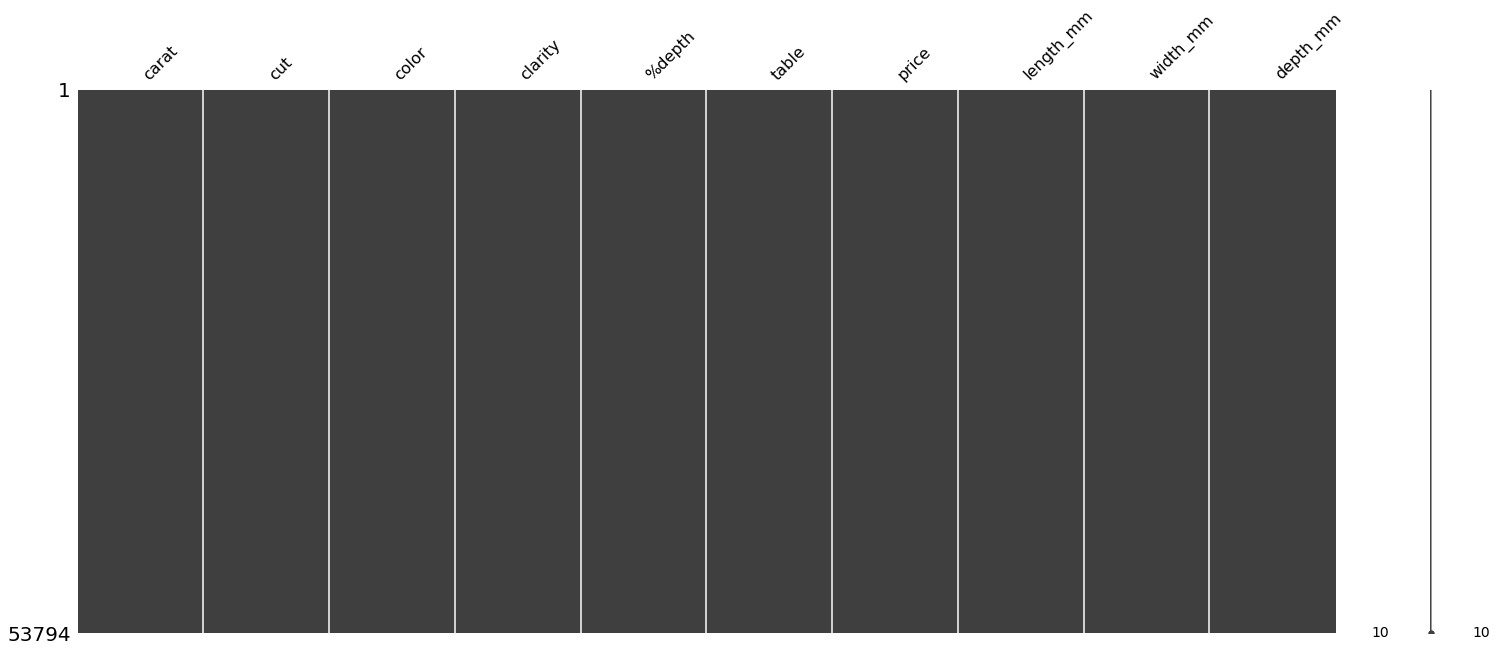

In [ ]:
# Visualizing of no missing value
msno.matrix(df)

Setelah melihat info dan unique value, untuk memastikan ada atau tidaknya missing value kita menggunakan syntax isnull di mana hasilnya tidak ada data yang missing. Juga saya mencoba untuk memvisualisasikannya agar lebih meyakinkan.

###No. 3

---



**ANALYZE COLUMN X,Y,Z OR LENGTH, WIDTH, AND DEPTH**

In [ ]:
# Check summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
%depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
length_mm,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
width_mm,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
depth_mm,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


Insight yang kita dapat dari summary di atas adalah:
1. Ada 53794 data setelah kita menghilangkan data duplikatnya.
2. Kemungkinan ada outlier pada data-data tersebut di mana nilai maxnya sangat jauh dari meannya, contoh pada width_mm di mana mediannya adalah `5.710000` dan nilai maxnya adalah `58.900000`.
3. Melihat nilai minimum dari `length`, `width`, dan `depth` adalah 0 kemungkinan itu juga termasuk sesuatu yang janggal. Di mana length, width, dan depth adalah dimensi dari berlian itu sendiri.

*Kita akan melakukan analysis terhadap distribusi masing2 kolom tersebut.*

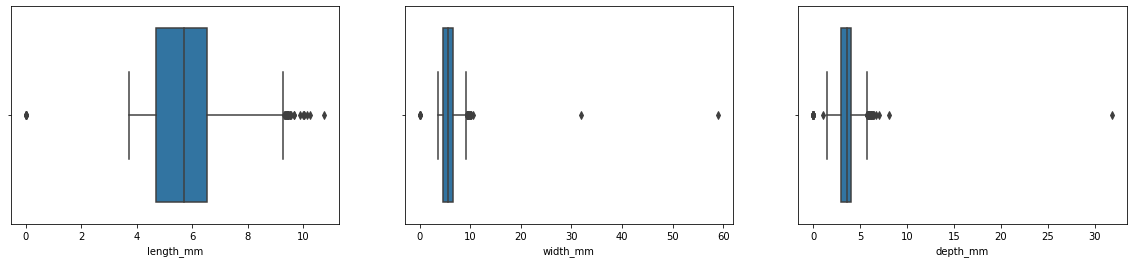

In [ ]:
# Plotting for distribution
plt.figure(figsize=(20, 10))
lowlist=['length_mm','width_mm','depth_mm']
for i in range(3):
    plt.subplot(2, 3, 1+i)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

Setelah melihat distribusi boxplot di atas saya dapat menyimpulkan bahwa:

1. Sungguh aneh melihat ada panjang diamond yang 0mm. Sedangkan carat paling kecilpun harusnya memiliki panjang kira-kira 1.7mm. Bisa dilihat pada gambar berikut.
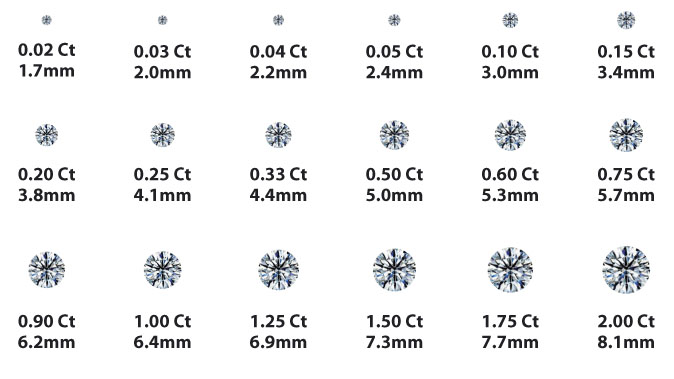

2. Sama seperti Length, Width juga aneh sekali. Di mana ada Width yang 0mm. Apakah itu berlian atau butiran debu? Hehe. Kita akan menindaklanjutinya setelah ini karena juga ada 2 titik outlier di rentang 30mm dan 60mm.

3. Untuk depth juga sangat aneh, di mana ada depth yang 0mm dan terlalu dalam atau tinggi sekitar 30an mm.

Untuk memahami perbedaan Length, Width, dan Depth bisa dilihat pada gambar berikut:

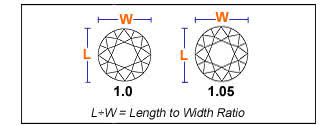

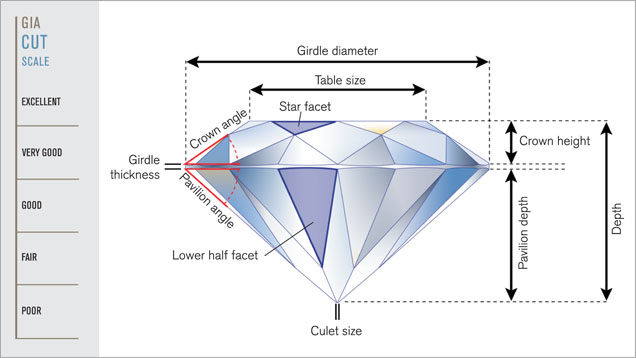

In [ ]:
# Check dimension column which has 0 value
df.loc[(df['length_mm']==0) | (df['width_mm']==0) | (df['depth_mm']==0)]

,carat,cut,color,clarity,%depth,table,price,length_mm,width_mm,depth_mm
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Setelah melihat data yang jika salah 1nya `length`, `width`, dan `depth` bernilai 0mm maka itu sangatlah nonsense. Why? Karena menurut saya panjang, lebar, dan tinggi adalah dimensi yang harusnya dimiliki oleh sebuah berlian, karena berlian adalah barang 3 dimensi. Jika salah 1nya bernilai 0 maka dimensinya akan turun ke 2 dimensi, begitu seterusnya hingga tidak ada dimensi sama sekali. Jadi di sini saya akan mengdrop data yang memiliki `length`, `width`, dan `depth` yang 0mm. Karena datanya tidak terlalu banyak dan jika saya mencoba mengimputasinya, data tidak merepresentasikan nilai dari berlian yang sebenarnya.

In [ ]:
# Drop data that has 0 value
df = df.drop(df[df["length_mm"]==0].index)
df = df.drop(df[df["width_mm"]==0].index)
df = df.drop(df[df["depth_mm"]==0].index)
df.shape

(53775, 10)

Data berkurang sekitar 19 baris setelah drop data yang tidak relevan. Setelah ini saya akan melihat outlier pada `depth` dan `width` yang sebelumnya sudah dapat kita lihat melalui 5 numbers summary dan boxplot.

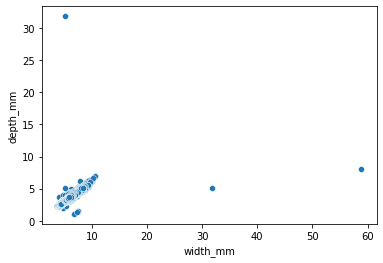

In [ ]:
# Plotting scatter
sns.scatterplot(data= df, x='width_mm', y='depth_mm')

Dari plot di atas bisa saya ambil kesimpulan bahwa memang ada outlier yang sangat significant antara `depth` dan `width` yang normal sebaran datanya di bawah 10mm. Ada 3 titik yang teridentifikasi melebihi batas wajar, 1 untuk `depth` dan 2 untuk `width`.

In [ ]:
# Search outlier for width and depth
df.loc[(df['depth_mm'] > 30) | (df['width_mm'] > 30)]

,carat,cut,color,clarity,%depth,table,price,length_mm,width_mm,depth_mm
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


Sesuai dengan scatter plot di atas ternyata memang hanya ada 3 baris untuk outlier pada kolom `width` dan `depth`. Seharusnya dimensi itu dipengaruhi oleh karat, karena semakin berat karatnya dimensinya akan semakin besar. Kita akan buktikan dengan heatmap untuk melihat korelasinya.

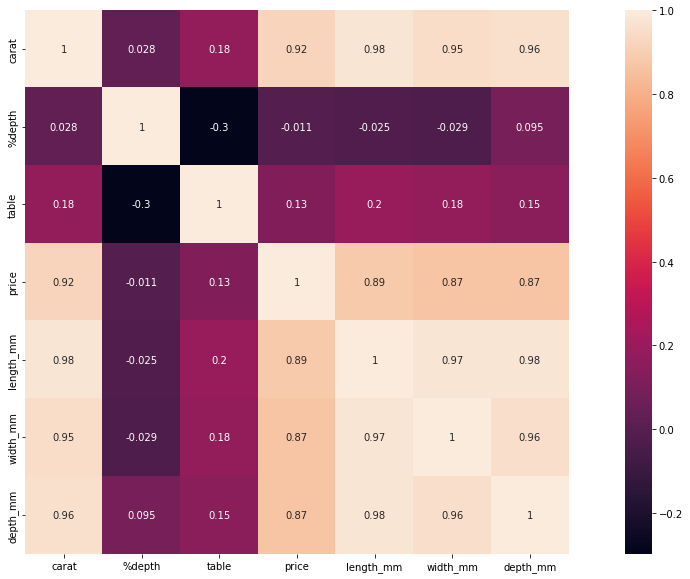

In [ ]:
# Correlation Map
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

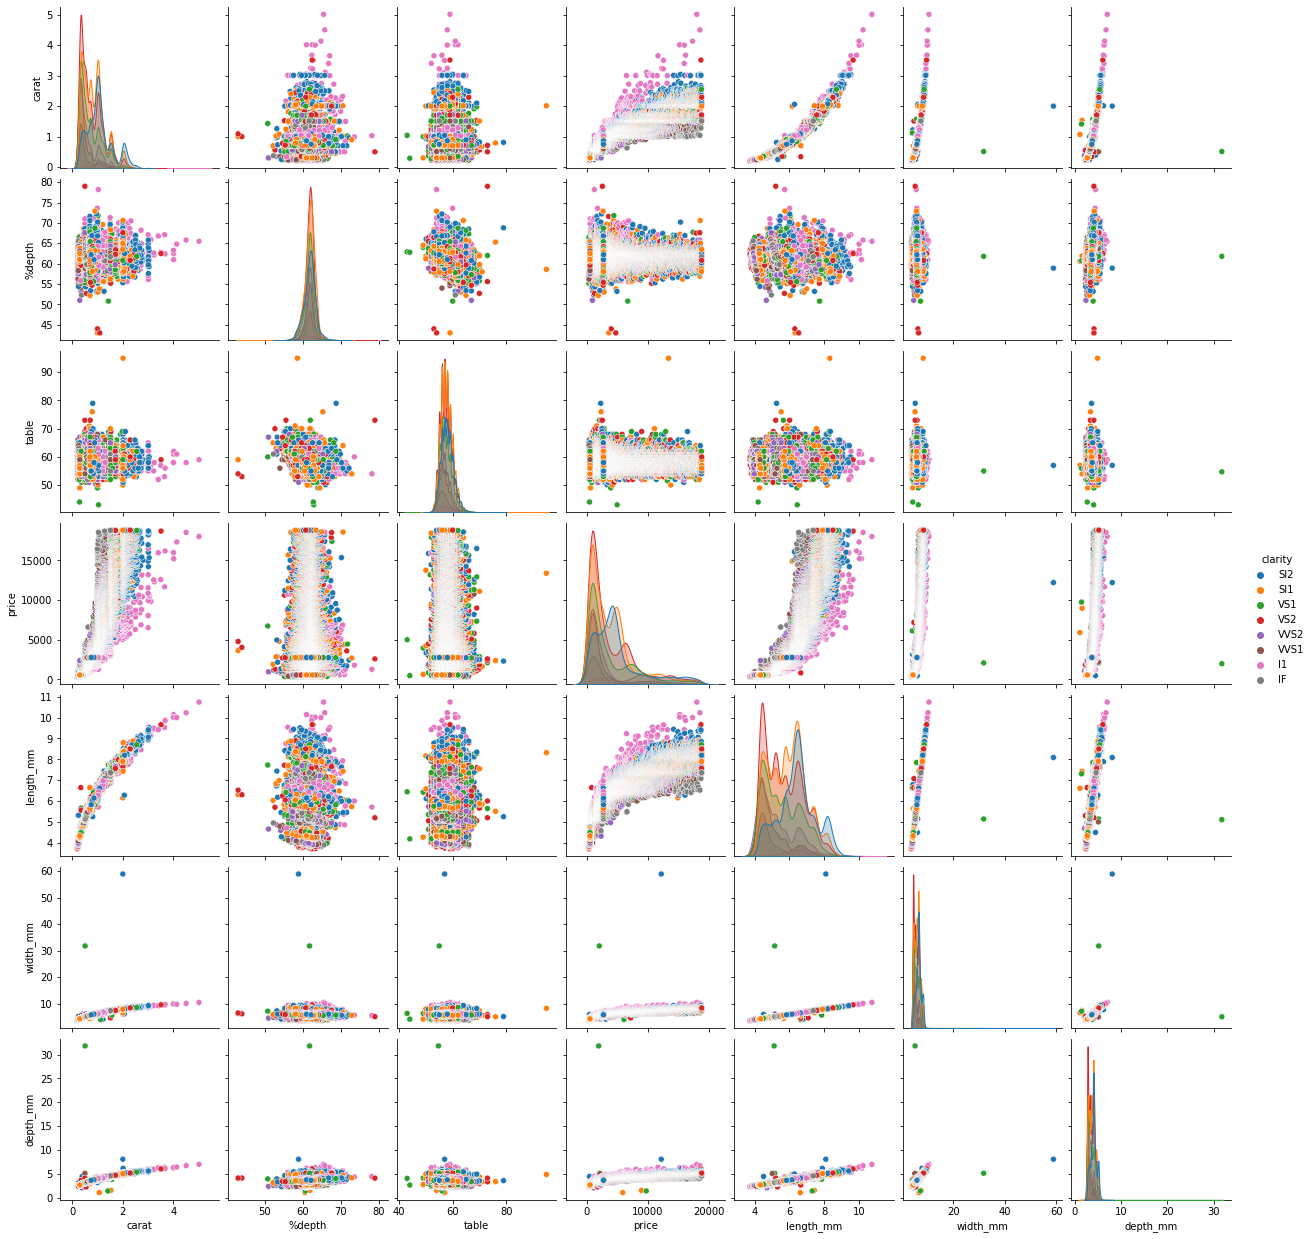

In [ ]:
# Pairplot
sns.pairplot(df, hue = 'clarity')
plt.show()

Bisa kita lihat bahwa karat memiliki strong positive correlation dengan dimensi dari berlian. Di mana semakin besar karat akan semakin besar pula dimensinya. Saya akan coba bandingkan dengan karat yang paling besar.

In [ ]:
df[df['carat'] > 5]

,carat,cut,color,clarity,%depth,table,price,length_mm,width_mm,depth_mm
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


Karat yang paling berat saja dimensinya tidak melebihi dari 15. Sebagai business intelligence, seharusnya saya menanyakan terlebih dahulu data tersebut kepada stakeholder, apakah data tersebut benar adanya atau terjadi kesalahan input. Tapi di sini saya mencari informasi dari google di mana untuk berlian 2 carat lebarnya sekitar 8.1mm bukan 58.9mm. Dan untuk berlian 0.5 carat ukurannya berkisar 5.16mm x 5.16mm x 3.11mm bukan 31.80mm.

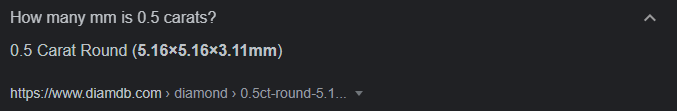

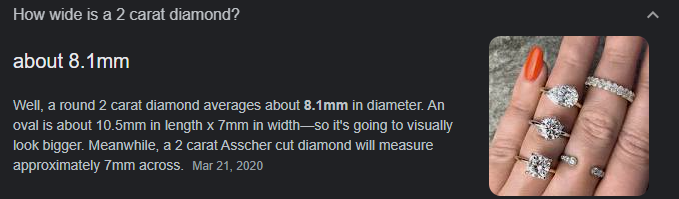

Jadi saya akan mengdrop baris tersebut dari data berlian ini.


In [ ]:
df = df.drop(df[df["width_mm"]> 30].index)
df = df.drop(df[df["depth_mm"]> 30].index)

df.describe()

,carat,%depth,table,price,length_mm,width_mm,depth_mm
count,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000,53772.000000
mean,0.797525,61.748283,57.457911,3931.137321,5.731557,5.733446,3.539325
std,0.473150,1.429626,2.233262,3985.853004,1.118590,1.110500,0.691068
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


Dengan demikian data yang kita miliki seharusnya sudah reliable karena kita sudah menghilangkan outlier-outliernya.

###No.4

---


Pertama-tama saya akan menjelaskan kepada customer tersebut tentang the 4Cs of diamond yakni, `carat`, `cut`, `color`, and `clarity`. Mengutip dari source(`https://www.diamonds.pro/education/diamond-prices/`) bahwa semakin baik nilai dari 4C harga akan semakin tinggi, tetapi carat memiliki pengaruh paling besar dengan harga berlian.

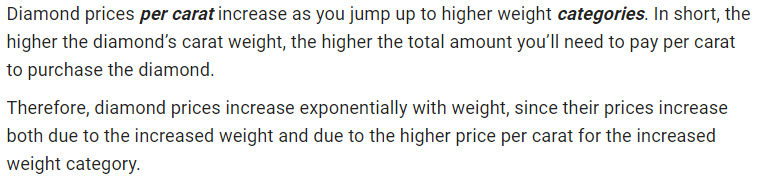

In [ ]:
# Check the mean of SI2 numerical data
df[df['clarity'] == 'SI2'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


carat           1.075917
%depth         61.770736
table          57.927306
price        5053.746308
length_mm       6.401420
width_mm        6.391832
depth_mm        3.950569
dtype: float64

In [ ]:
# Check the mean of IF numerical data
df[df['clarity'] == 'IF'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


carat           0.505645
%depth         61.509753
table          56.511155
price        2870.569507
length_mm       4.969849
width_mm        4.991289
depth_mm        3.062517
dtype: float64

Memang benar rata-rata harga dari `clarity` *IF* lebih rendah ketimbang *SI2*. Tetapi bisa dilihat juga bahwa rata-rata `carat` dari *IF* juga lebih rendah dari *SI2*. Yang mana kita tau bahwa ***diamond prices increase exponentially with weight(`carat`)*** yang juga bisa berarti ***diamond prices decrease exponentially with weight(`carat`)***.


Kita akan membuktikan korelasi antara carat dan harga berlian.

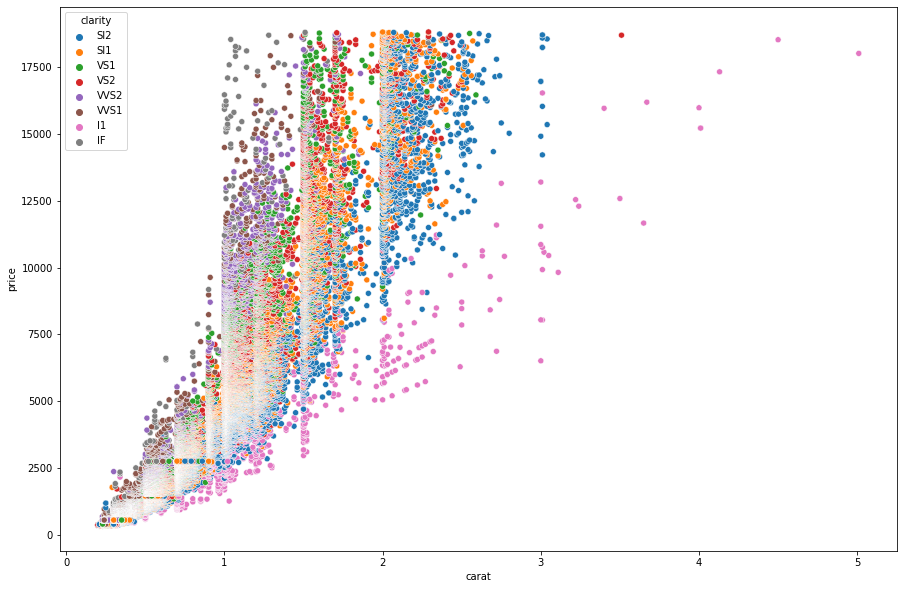

In [ ]:
# Scatter plot for Carat and Price with Clarity
plt.figure(figsize=(15, 10))
sns.scatterplot(x='carat', y='price', hue= 'clarity', data=df)

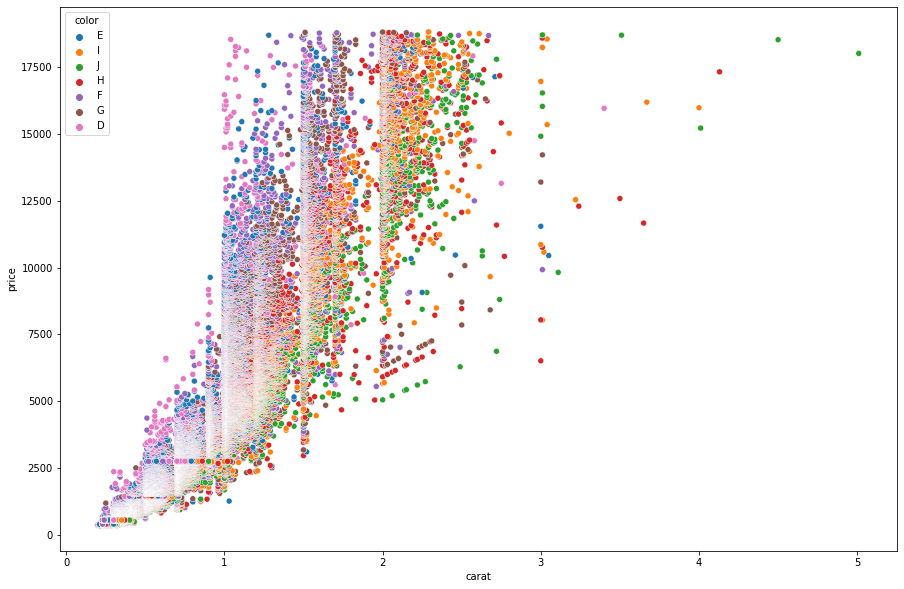

In [ ]:
# Scatter plot for Carat and Price with Color
plt.figure(figsize=(15, 10))
sns.scatterplot(x='carat', y='price', hue= 'color', data=df)

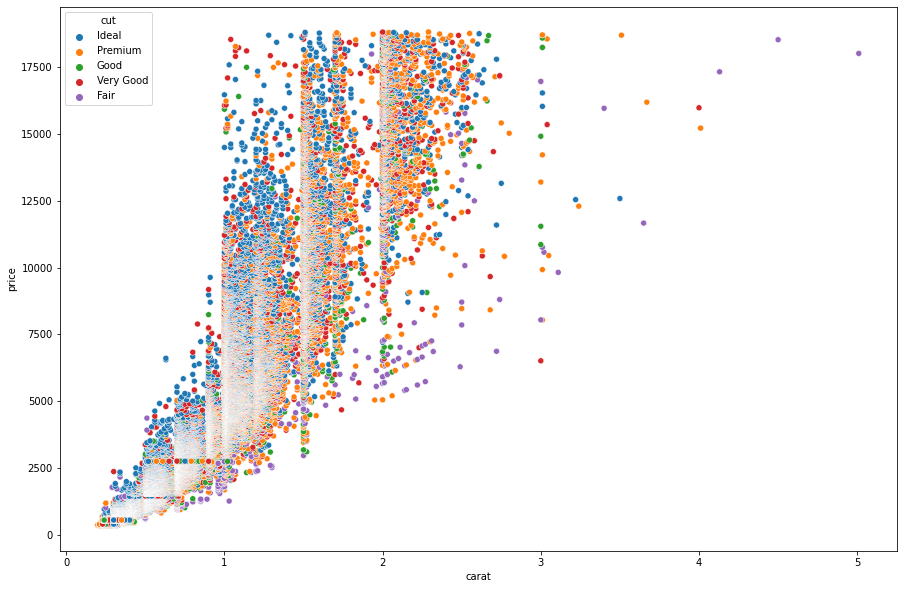

In [ ]:
# Scatter plot for Carat and Price with Cut
plt.figure(figsize=(15, 10))
sns.scatterplot(x='carat', y='price', hue= 'cut', data=df)

In [ ]:
corr.head()

,carat,%depth,table,price,length_mm,width_mm,depth_mm
carat,1.000000,0.027889,0.181113,0.921548,0.977857,0.953980,0.961030
%depth,0.027889,1.000000,-0.297580,-0.011144,-0.025224,-0.029262,0.094678
table,0.181113,-0.297580,1.000000,0.126666,0.195451,0.183814,0.151683
price,0.921548,-0.011144,0.126666,1.000000,0.887137,0.867685,0.868030
length_mm,0.977857,-0.025224,0.195451,0.887137,1.000000,0.974822,0.975382


**KESIMPULAN DARI PLOT DI ATAS**

1. Berat karat dan harga berlian memang memiliki strong positive correlation.
2. Bisa kita simpulkan juga bahwa walaupun level `clarity` tidak bagus, tetapi jika berlian tersebut memiliki `carat` yang lebih berat bisa dipastikan bahwa harganya mampu menyaingi harga berlian yang memiliki `clarity` terbaik sekalipun.Bisa dibuktikan dengan melihat scatterplot di mana mayoritas `clarity` *I1* `price`nya berada di bawah yang lain, tapi ketika `carat`nya meningkat `price`nya pun meningkat.
3. Hal di atas juga dapat dibuktikan ketika `color` yang tidak bagus pun, jika `carat`nya bertambah harganya juga akan semakin tinggi. Dibuktikan dengan warna hijau dari `color` *J* yang terlihat dari scatter plot mayoritas berada di bawah warna-warna lain tapi ketika `carat`nya bertambah, `price`nya pun ikut meningkat.
4. Untuk `cut` dengan kualitas *FAIR* pun ketika `carat`nya bertambah, `price`nya juga meningkat.

kesimpulan ini mendukung hipotesa awal saya di mana harga sangat dipengaruhi oleh karatnya.

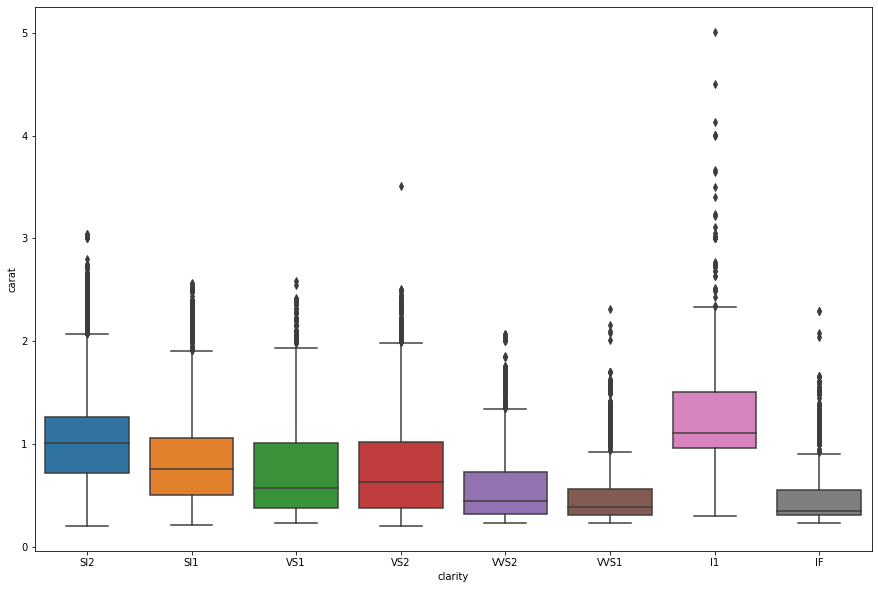

In [ ]:
# Boxplot to see distribution of each clarity by carat
plt.figure(figsize=(15, 10))
sns.boxplot(x='clarity', y='carat',data=df)

Bisa kita pastikan kenapa rata-rata harga dari `clarity` *SI2* lebih tinggi karena sebaran datanya lebih luas per karatnya ketimbang *IF* yang mediannya saja tidak sampai 1 karat dan maksimalnya pun hanya sekitar 2 karat di mana *SI2* maksimalnya hingga 3 karat. Begitulah jawaban saya untuk no.4.